# Create split index for CellXGeneNexusDataModule

 The NexusDB data-loader consists of two layers: a front-end and a back-end. The front-end serves data to multiple node GPUs, while the back-end is responsible for data storage. We use the universal data storage engine [TileDB](https://tiledb.com/) as our back-end. For distributed data parallel training, the front-end is based on the [LitData package](https://github.com/Lightning-AI/litdata). NexusDB supports indexing to reuse the same dataset files for multiple training splits and works with the existing dataset [CELLxGENE Census](https://chanzuckerberg.github.io/cellxgene-census/), which is based on [TileDB-SOMA](https://github.com/single-cell-data/TileDB-SOMA). 

 This notebook is designed to show how to generate indexes for NexusDB. 

 *WARNING* : This notebook is not intended to be run through multiple times. The indices created are shared by all users and should not be rebuilt unless an error is discovered.

## `dataset_id`-level split for cellxgene

First, refer to `cellxgene_dataset_split` notebook to learn about dataset-id split. The code reuses `celltypes_split.csv` to generate train and dev split. The cell generates new index in `cellxgene_nexus_index` folder.

In [1]:
from pathlib import Path

from bmfm_targets.datasets.cellxgene import create_litdata_index_for_dataset_split

# CCC URI
uri = "/dccstor/bmfm-targets/data/omics/transcriptome/scRNA/pretrain/cellxgene/soma-2023-12-15"
# ZUVELA URI
uri='/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/soma'


/proj/bmfm/users/dmichael/envs/targets/lib/python3.11/site-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()


In [2]:
full_label_columns = ['dataset_id', 'assay', 'assay_ontology_term_id',
       'cell_type', 'cell_type_ontology_term_id', 'development_stage',
       'development_stage_ontology_term_id', 'disease',
       'disease_ontology_term_id', 'donor_id',
       'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id',
       'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue',
       'tissue_ontology_term_id', 'tissue_general',
       'tissue_general_ontology_term_id']
limited_label_columns = ['cell_type', 'tissue', 'tissue_general', 'disease', 'donor_id', "sex"]

## Human data index creation

The following code will create an index for all of the human data

In [ ]:
create_litdata_index_for_dataset_split(uri=uri, index_dir="cellxgene_nexus_index")

Example of creating an index with 10% random samples

In [ ]:
create_litdata_index_for_dataset_split(
    uri=uri,
    value_filter="scTab",
    index_dir="cellxgene_random_10pct_nexus_index",
    sampling_strategy="random",
    sampling_fraction=0.1,
)

In [3]:
create_litdata_index_for_dataset_split(
    uri=uri,
    experiment='homo_sapiens',
    value_filter="scTab",
    census_version="2025-01-30",
    index_dir="/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/cellxgene_equal_downsample_1pct_nexus_index",
    sampling_strategy="equal_downsample",
    sampling_fraction=0.01,
    label_columns=['cell_type', 'tissue', 'tissue_general', 'disease', 'donor_id', "sex"],
    groupby_columns=['cell_type', 'tissue', 'tissue_general', 'disease']
)

INFO - Downsampling 28174719 to 281747
INFO - Attempting to construct equal sample sizes for 6964 combination of the following columns: ['cell_type', 'tissue', 'tissue_general', 'disease']
INFO - Initial sample size of 40 leaves 59869 remaining samples due to insufficient samples in some sets.
INFO - Obtained 284501 samples
INFO - With 4718 downsampled to size 53 and 2246 smaller groups
INFO - Downsampling 3764497 to 37644
INFO - Attempting to construct equal sample sizes for 1060 combination of the following columns: ['cell_type', 'tissue', 'tissue_general', 'disease']
INFO - Initial sample size of 35 leaves 3746 remaining samples due to insufficient samples in some sets.
INFO - Obtained 38423 samples
INFO - With 900 downsampled to size 40 and 160 smaller groups


In [4]:
create_litdata_index_for_dataset_split(
    uri=uri,
    experiment='homo_sapiens',
    value_filter="scTab",
    census_version="2025-01-30",
    index_dir="/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/cellxgene_equal_downsample_10pct_nexus_index",
    sampling_strategy="equal_downsample",
    sampling_fraction=0.1,
    label_columns=['cell_type', 'tissue', 'tissue_general', 'disease', 'donor_id', "sex"],
    groupby_columns=['cell_type', 'tissue', 'tissue_general', 'disease']
)

INFO - Downsampling 28174719 to 2817471
INFO - Attempting to construct equal sample sizes for 6964 combination of the following columns: ['cell_type', 'tissue', 'tissue_general', 'disease']
INFO - Initial sample size of 404 leaves 1318902 remaining samples due to insufficient samples in some sets.
INFO - Obtained 2818963 samples
INFO - With 1966 downsampled to size 975 and 4998 smaller groups
INFO - Downsampling 3764497 to 376449
INFO - Attempting to construct equal sample sizes for 1060 combination of the following columns: ['cell_type', 'tissue', 'tissue_general', 'disease']
INFO - Initial sample size of 355 leaves 118215 remaining samples due to insufficient samples in some sets.
INFO - Obtained 376829 samples
INFO - With 496 downsampled to size 580 and 564 smaller groups


## Mouse index creation

In [ ]:
create_litdata_index_for_dataset_split(
    uri=uri,
    experiment='mus_musculus',
    dataset_split_file=Path().cwd() / "celltypes_split_mouse.csv",
    value_filter="scTab",
    census_version="2025-01-30",
    index_dir="/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/cellxgene_random_mouse_10pct_nexus_index",
    sampling_strategy="random",
    sampling_fraction=0.1,
)

In [ ]:
create_litdata_index_for_dataset_split(
    uri=uri,
    experiment='mus_musculus',
    dataset_split_file=Path().cwd() / "celltypes_split_mouse.csv",
    value_filter="scTab",
    census_version="2025-01-30",
    index_dir="/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/cellxgene_random_mouse_1pct_nexus_index",
    sampling_strategy="random",
    sampling_fraction=0.01,
)

In [ ]:
create_litdata_index_for_dataset_split(
    uri=uri,
    experiment='mus_musculus',
    dataset_split_file=Path().cwd() / "celltypes_split_mouse.csv",
    value_filter="scTab",
    census_version="2025-01-30",
    index_dir="/proj/bmfm/omics/data/scRNA/cellxgene/2025-01-30/cellxgene_mouse_nexus_index",

)

In [2]:
from bmfm_targets.datasets.cellxgene.cellxgene_soma_utils import get_obs_as_pandas

In [3]:
obs = get_obs_as_pandas(uri=uri,
                  experiment="homo_sapiens",
                  value_filter="is_primary_data == True",     
                  census_version="2025-01-30",
)

In [4]:
obs.iloc[0]

soma_joinid                                                                 5716
dataset_id                                  a5d95a42-0137-496f-8a60-101e17f263c8
assay                                                                 Smart-seq2
assay_ontology_term_id                                               EFO:0008931
cell_type                                                           naive B cell
cell_type_ontology_term_id                                            CL:0000788
development_stage                                              26-year-old stage
development_stage_ontology_term_id                                HsapDv:0000120
disease                                                                   normal
disease_ontology_term_id                                            PATO:0000461
donor_id                                                                 CONTROL
is_primary_data                                                             True
observation_joinid          

In [5]:
from bmfm_targets.datasets.datasets_utils import equal_samples_per_set_downsample

In [6]:
groupby_columns= ["cell_type", "disease", "tissue"]
quota_ds = equal_samples_per_set_downsample(obs, groupby_columns=groupby_columns, frac=0.01)

In [7]:
quota_ds_10pct = equal_samples_per_set_downsample(obs, groupby_columns=groupby_columns, frac=0.1)

In [ ]:
quota_ds.shape

(626341, 28)

In [ ]:
quota_ds.shape[0] / quota_ds.groupby(groupby_columns, observed=True).size().shape[0]

46.93099055896898

In [ ]:
quota_ds_10pct.shape[0] / quota_ds_10pct.groupby(groupby_columns, observed=True).size().shape[0]

469.31005544732506

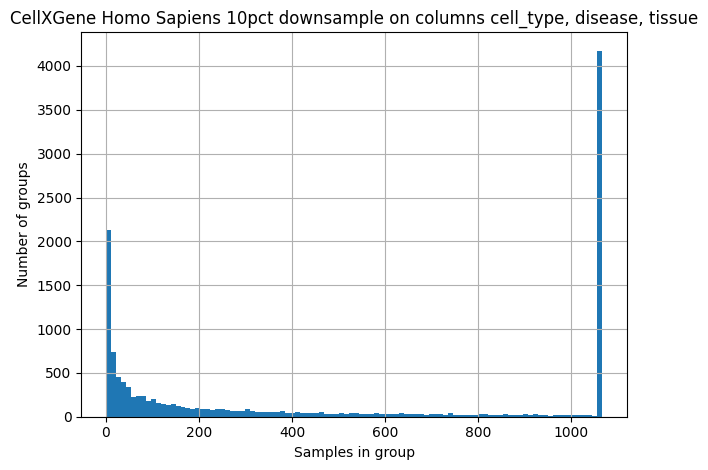

In [9]:
import matplotlib.pyplot as plt

#quota_ds.groupby(groupby_columns, observed=True).size().hist(bins=70)
quota_ds_10pct.groupby(groupby_columns, observed=True).size().hist(bins=100,ax=plt.gca())
plt.title("CellXGene Homo Sapiens 10pct downsample on columns " + ", ".join(groupby_columns))
plt.xlabel("Samples in group")
plt.ylabel("Number of groups")
plt.tight_layout()


## Create short index for debugging proposes

In [ ]:
import os
import shutil

from bmfm_targets.datasets.cellxgene.cellxgene_soma_utils import build_range_index

uri = "/dccstor/bmfm-targets/data/omics/transcriptome/scRNA/pretrain/cellxgene/soma-2023-12-15"
index_dir="cellxgene_debug_nexus_index"

os.mkdir(index_dir)
train_index_dir = os.path.join(index_dir, "train")
build_range_index(
    uri,
    train_index_dir,
    n_records=32,
    chunk_size=8,
    label_columns=["cell_type", "tissue"],
    value_filter="is_primary_data == True and nnz <= 512",
)
shutil.copytree(train_index_dir, os.path.join(index_dir, "dev"), dirs_exist_ok=True)